#### Introduction:
This script performs a comprehensive sentiment analysis on a Twitter dataset.
It covers data loading, preprocessing, visualization of sentiment distribution and common words, and building a machine learning model to classify sentiments.
It also includes an entity-level analysis to understand public opinion toward different topics or brands.
"""

In [3]:
# Sentiment Analysis and Visualization on Twitter Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [13]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -------------------------------- ------- 245.8/301.2 kB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 4.6 MB/s eta 0:00:00


In [15]:
from wordcloud import WordCloud

In [17]:
# Step 1: Load and Understand the Dataset
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ["tweet_id", "entity", "sentiment", "content"]
print(df.head())

   tweet_id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                             content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [19]:
# Step 2: Clean and Prepare the Data
df.drop_duplicates(inplace=True)
df.dropna(subset=["content", "sentiment"], inplace=True)

def clean_text(text):
    text = re.sub(r"http\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower().strip()

df["clean_content"] = df["content"].apply(clean_text)

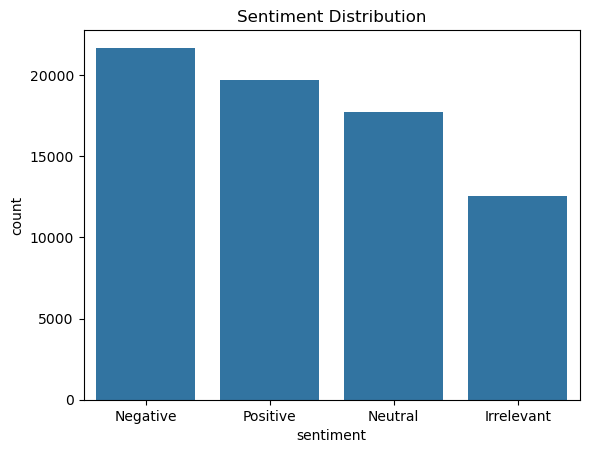

In [21]:
# Step 3: Explore Sentiment Distribution
sns.countplot(data=df, x="sentiment", order=df["sentiment"].value_counts().index)
plt.title("Sentiment Distribution")
plt.show()

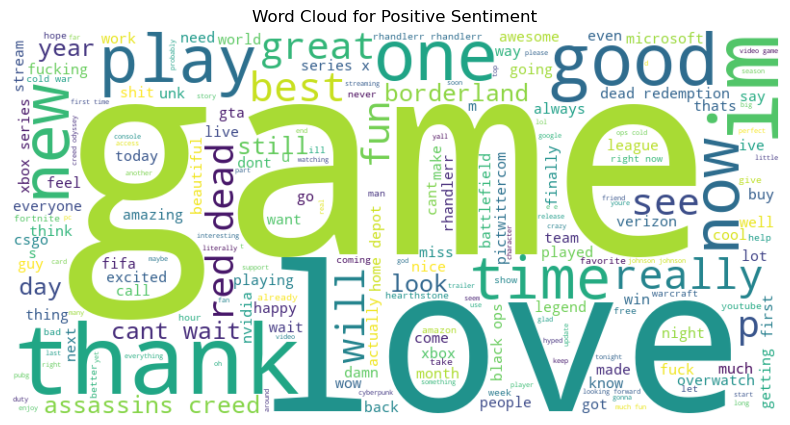

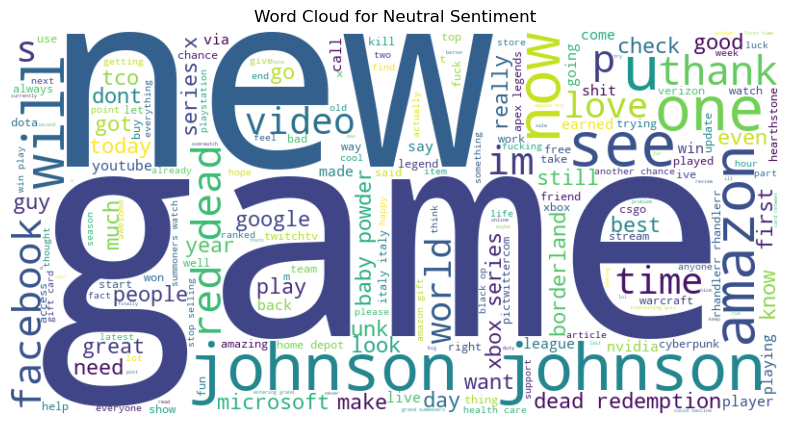

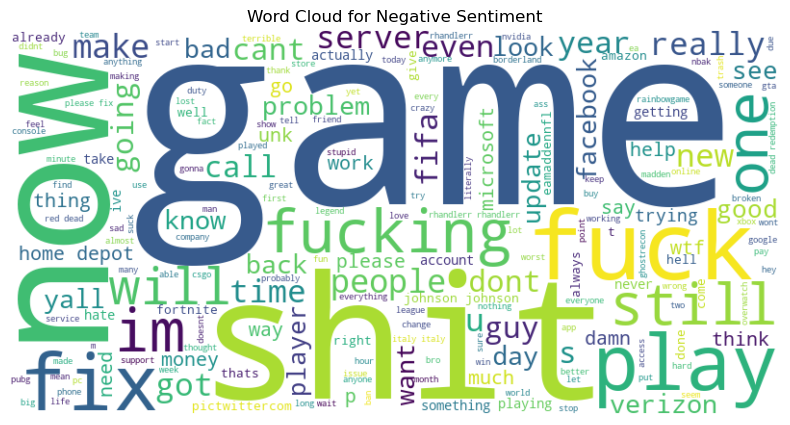

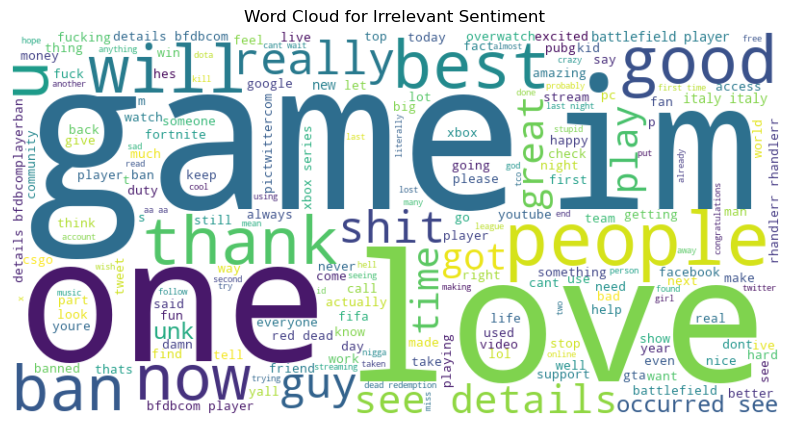

In [23]:
# Step 4: Visualize Word Usage
for sentiment in df["sentiment"].unique():
    text = " ".join(df[df["sentiment"] == sentiment]["clean_content"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.axis("off")
    plt.show()

In [25]:
# Step 5: Convert Text to Features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["clean_content"])
y = df["sentiment"]

In [27]:
# Step 6: Train a Sentiment Classification Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.51      0.35      0.42      2529
    Negative       0.63      0.71      0.67      4383
     Neutral       0.53      0.52      0.53      3543
    Positive       0.58      0.64      0.61      3877

    accuracy                           0.58     14332
   macro avg       0.57      0.55      0.55     14332
weighted avg       0.57      0.58      0.57     14332



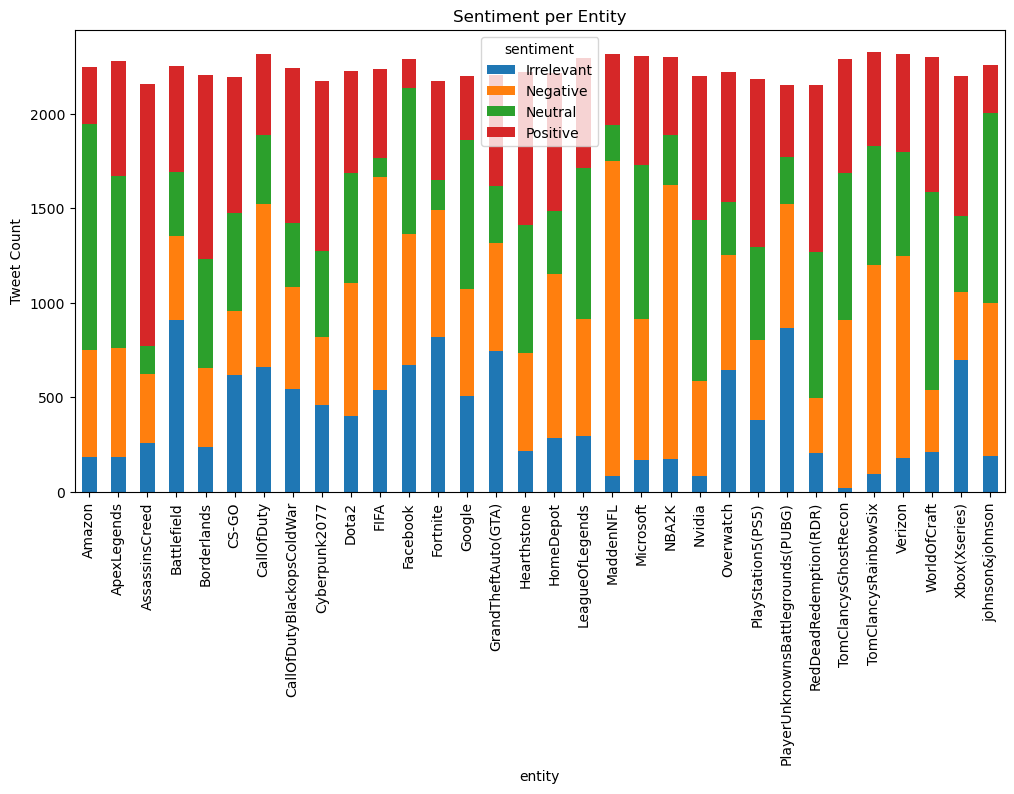

In [29]:
# Step 7: Topic or Brand Sentiment Analysis
entity_sentiment = df.groupby(["entity", "sentiment"]).size().unstack(fill_value=0)
entity_sentiment.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Sentiment per Entity")
plt.ylabel("Tweet Count")
plt.show()

#### This analysis provided insights into public sentiment expressed on Twitter, including sentiment distributions, frequently used terms, and sentiment breakdowns by entity or brand.
The classification model offers a basic yet effective way to predict sentiments based on tweet content, supporting data-driven decisions in brand monitoring and public opinion research.
"""